Index(['ID', 'Timezone', 'Wind_Speed(mph)', 'Weather_Condition', 'BumpStop',
       'Traffic_Signal'],
      dtype='object')


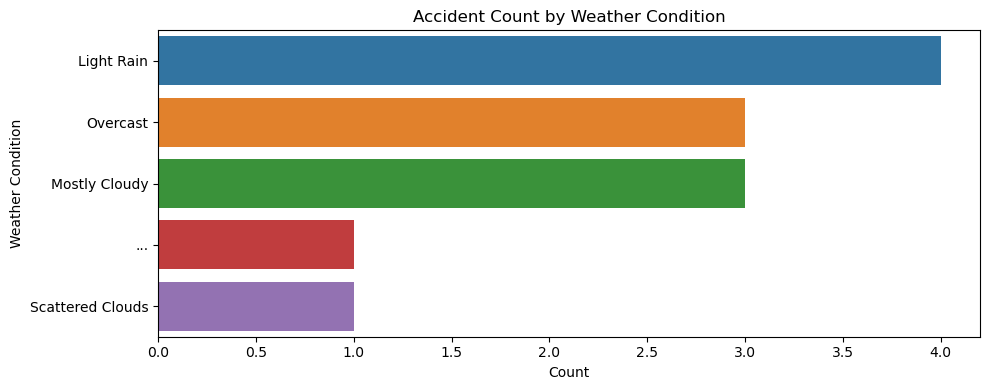

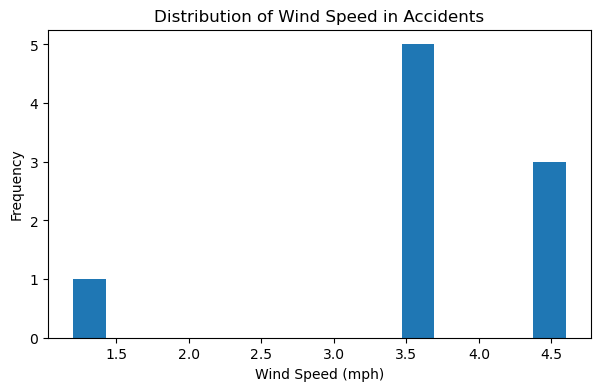

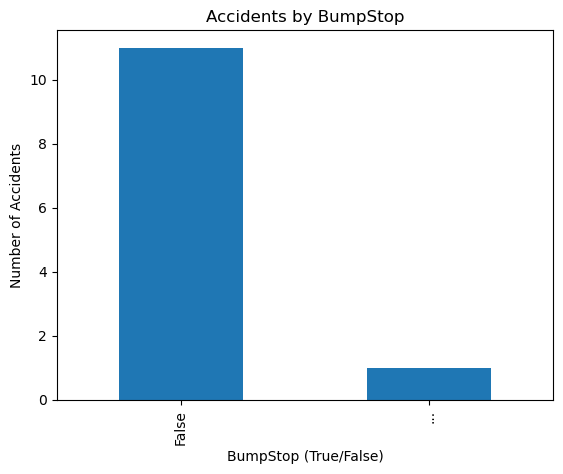

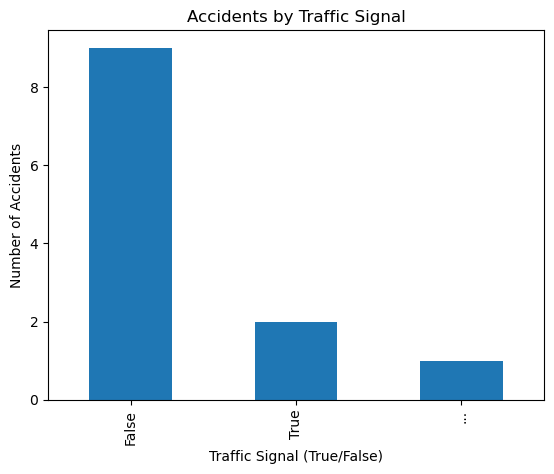

Weather condition accident frequencies:
Light Rain          4
Overcast            3
Mostly Cloudy       3
...                 1
Scattered Clouds    1
Name: WeatherCondition, dtype: int64

Wind Speed stats:
count    9.000000
mean     3.611111
std      1.049338
min      1.200000
25%      3.500000
50%      3.500000
75%      4.600000
max      4.600000
Name: WindSpeed, dtype: float64

Accident counts by BumpStop and TrafficSignal:
       BumpStop  TrafficSignal
...         1.0              1
False      11.0              9
True        NaN              2


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset and inspect the columns
df = pd.read_csv('ID-Timezone-WindSpeedmph-WeatherCondition-BumpStop-TrafficSignal.csv')
print(df.columns)  # See actual column names

# Rename columns for more convenient use if needed
df.rename(columns={
    'Wind_Speed(mph)': 'WindSpeed',
    'Weather_Condition': 'WeatherCondition',
    'Traffic_Signal': 'TrafficSignal'
}, inplace=True)

# Convert columns to appropriate types
df['WindSpeed'] = pd.to_numeric(df['WindSpeed'], errors='coerce')
df['BumpStop'] = df['BumpStop'].astype(str)
df['TrafficSignal'] = df['TrafficSignal'].astype(str)

# Accident count by weather
plt.figure(figsize=(10,4))
sns.countplot(y='WeatherCondition', data=df, order=df['WeatherCondition'].value_counts().index)
plt.title('Accident Count by Weather Condition')
plt.xlabel('Count')
plt.ylabel('Weather Condition')
plt.tight_layout()
plt.show()

# Distribution of wind speed
plt.figure(figsize=(7,4))
df['WindSpeed'].plot.hist(bins=15)
plt.title('Distribution of Wind Speed in Accidents')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Frequency')
plt.show()

# Count accidents at BumpStop and TrafficSignal
(df['BumpStop'].value_counts().plot(kind='bar', title='Accidents by BumpStop'))
plt.xlabel('BumpStop (True/False)')
plt.ylabel('Number of Accidents')
plt.show()

(df['TrafficSignal'].value_counts().plot(kind='bar', title='Accidents by Traffic Signal'))
plt.xlabel('Traffic Signal (True/False)')
plt.ylabel('Number of Accidents')
plt.show()

# Print summaries
print("Weather condition accident frequencies:")
print(df['WeatherCondition'].value_counts())
print("\nWind Speed stats:")
print(df['WindSpeed'].describe())
print("\nAccident counts by BumpStop and TrafficSignal:")
print(df[['BumpStop', 'TrafficSignal']].apply(pd.Series.value_counts))
